# Prueba Técnica

### Approach

Fraud detection

In general, the problem of detecting fraudulent transactions is a particularly important one for companies, given that it is a recurrent loss of money, so they put special effort into it.

We will work with a credit card transactions dataset, beeing each line is one transaction, on two different days in September 2013

# Utilized Libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Exploratory Analysis

We have a dataset composed of 31 columns, of which 28 are normalised, another column for time converted into seconds, an amount column indicating the amount of money in each transaction and, finally, the class column that determines whether the operation was fraudulent or not.

In [4]:
pd.set_option("display.float", "{:.2f}".format)

In [6]:
df=pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [7]:
df.shape

(284807, 31)

It can be observed that there are 284807 cases, distributed in 31 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

30 numeric variables of type float and one numeric variable of type integer are shown.

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Of these 284807 cases, there is no null data.

In [10]:
df.Amount.describe()

count   284807.00
mean        88.35
std        250.12
min          0.00
25%          5.60
50%         22.00
75%         77.16
max      25691.16
Name: Amount, dtype: float64

Taking the amount as a reference, it is observed that most of the operations are between 5.60 and 77.16 units, with quantiles of 25% and 75%, leaving the transaction of 25691.16 units as the highest amount, an operation that would unbalance the results that the algorithm could give when making our prediction.

In [12]:
conteo = df.Class.value_counts()
num_nofraude = conteo[0]
num_fraude = conteo[1]
porcentaje_fraude = (num_fraude/(num_fraude+num_nofraude))*100
porcentaje_nofraude = (num_nofraude/(num_fraude+num_nofraude))*100
print("Percentage of fraudulent operations is " + str("{:.2f}".format(porcentaje_fraude)) + " and % of no fraudulent operations is " + str("{:.2f}".format(porcentaje_nofraude) + "%."))

Percentage of fraudulent operations is 0.17 and % of no fraudulent operations is 99.83%.


<AxesSubplot:title={'center':'Distribución de las operaciones en tiempo (Segundos)'}, xlabel='Time', ylabel='Count'>

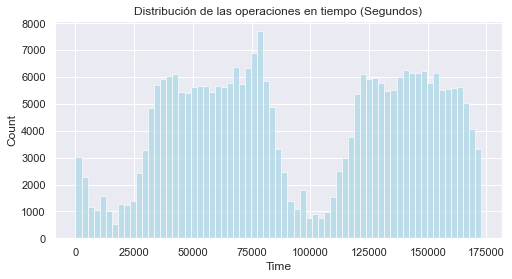

In [13]:
sns.set(rc={'figure.figsize':(8, 4)})
plt.title('Distribución de las operaciones en tiempo (Segundos)')
sns.histplot(df['Time'], color='lightblue')

The graph above clearly shows that the majority of transactions take place during daylight hours, with transactions dropping dramatically in the evening, around the 100,000th second.

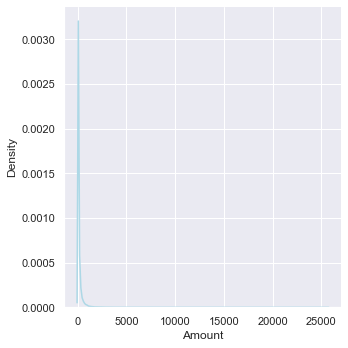

In [10]:
sns.set(rc={'figure.figsize':(8, 4)})
sns.displot(df['Amount'], kind='kde', color='lightblue')
plt.show()

As for the amount of transactions, the graph shows a very high percentage of small transactions, with a very low percentage of high transactions, which skews the data and unbalances it. It is found that the value of transactions does not follow a normal distribution.

In [11]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

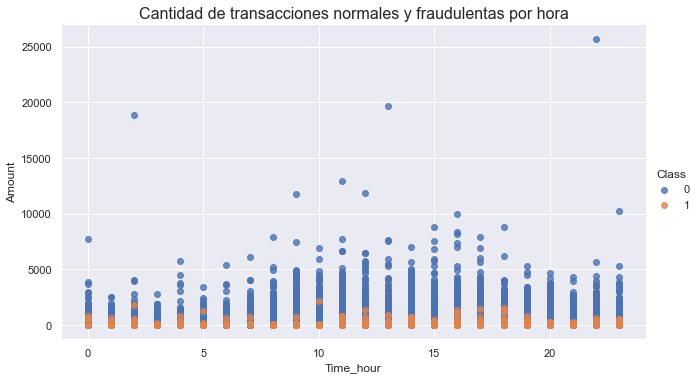

In [12]:
sns.set(rc={'figure.figsize':(8, 4)})
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Cantidad de transacciones normales y fraudulentas por hora", fontsize=16)

plt.show()

This graph shows that the vast majority of fraudulent transactions are for small amounts. There is no hourly pattern that determines a greater number of fraudulent transactions.

# Data Preprocessing

The following graphs show, in a first graph, the distribution of the transaction amounts before the median imputation technique (Median Imputer) was applied. The second graph shows the execution of the median imputation technique, which eliminates outliers and replaces them with the median of each column. 

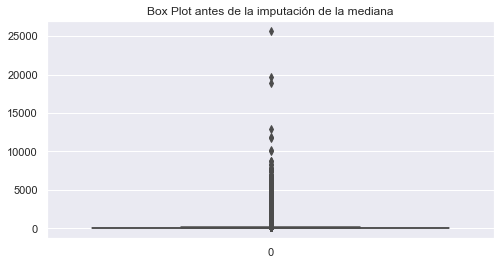

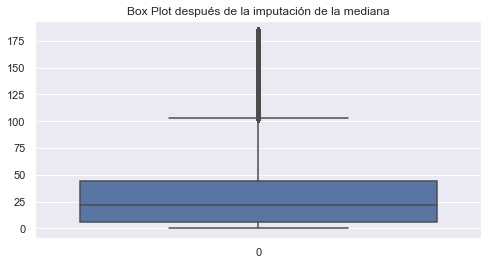

In [13]:
sns.boxplot(data=df['Amount'])
plt.title("Box Plot antes de la imputación de la mediana")
plt.show()
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['Amount'])
for i in df['Amount']:
    if i > Upper_tail or i < Lower_tail:
            df['Amount'] = df['Amount'].replace(i, med)
sns.boxplot(data=df['Amount'])
plt.title("Box Plot después de la imputación de la mediana")
plt.show()            

With the RobustScaler technique, the quantity and time variables are scaled in order to make the algorithm more accurate.

In [14]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,Time_hour,scaled_amount,scaled_time
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.11,0.07,0.13,-0.19,0.13,-0.02,0,0,3.29,-0.99
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,0.10,-0.34,0.17,0.13,-0.01,0.01,0,0,-0.50,-0.99
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0,0,0.00,-0.99
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,-0.19,-1.18,0.65,-0.22,0.06,0.06,0,0,2.62,-0.99
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,-0.14,0.14,-0.21,0.50,0.22,0.22,0,0,1.24,-0.99


# Prediction

The variables are separated from the target variable.

In [16]:
X= np.asarray(df.drop(['Class'], axis=1))
y= np.asarray(df['Class'])


Using the following function, the confusion matrix is added to each of the test algorithms.

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The dataset is divided into a training and a test part, taking 30% as the test size.

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

### Logistic Regression

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     85308
           1      0.849     0.585     0.693       135

    accuracy                          0.999     85443
   macro avg      0.924     0.793     0.846     85443
weighted avg      0.999     0.999     0.999     85443

Normalized confusion matrix
[[1.00e+00 1.64e-04]
 [4.15e-01 5.85e-01]]


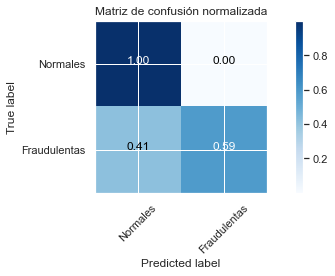

In [19]:
clasificador = LogisticRegression(n_jobs=-1)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)

print(classification_report(y_test,yhat,digits=3))

# Computando matriz de confusión
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

# Ploteo de matriz de confusión normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normales','Fraudulentas'],
                      title='Matriz de confusión normalizada', normalize=True)

plt.show()

The f1-score macro avg is taken as a reference value, which gives a value of 0.846, with 100% of true negatives and 59% of true positives being correct.

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     85308
           1      0.817     0.630     0.711       135

    accuracy                          0.999     85443
   macro avg      0.908     0.815     0.855     85443
weighted avg      0.999     0.999     0.999     85443

Normalized confusion matrix
[[1.00e+00 2.23e-04]
 [3.70e-01 6.30e-01]]


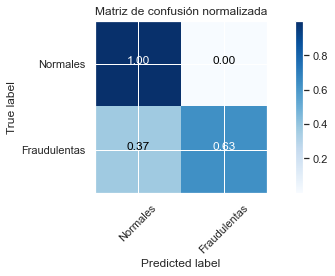

In [20]:
clasificador = AdaBoostClassifier()
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)

print(classification_report(y_test,yhat,digits=3))

cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normales','Fraudulentas'],
                      title='Matriz de confusión normalizada', normalize=True)

plt.show()

In the following case, the f1-score gives a value of 0.86, hitting 100% of true negatives and 64% of true positives, improving on the previous model.

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85308
           1      0.903     0.756     0.823       135

    accuracy                          0.999     85443
   macro avg      0.951     0.878     0.911     85443
weighted avg      0.999     0.999     0.999     85443

Normalized confusion matrix
[[1.00e+00 1.29e-04]
 [2.44e-01 7.56e-01]]


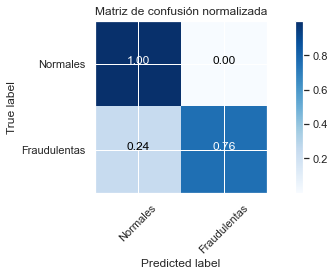

In [21]:
clasificador = RandomForestClassifier(n_jobs=-1)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)

print(classification_report(y_test,yhat,digits=3))

cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normales','Fraudulentas'],
                      title='Matriz de confusión normalizada', normalize=True)

plt.show()

In this case, it continues to take the macro avg and f1-score as the reference value, giving 0.911, hitting 100% of true negatives and 76% of true positives. This algorithm improves on its predecessors.

[12:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85308
           1      0.928     0.763     0.837       135

    accuracy                          1.000     85443
   macro avg      0.964     0.881     0.919     85443
weighted avg      1.000     1.000     1.000     85443

Normalized confusion matrix
[[1.00e+00 9.38e-05]
 [2.37e-01 7.63e-01]]


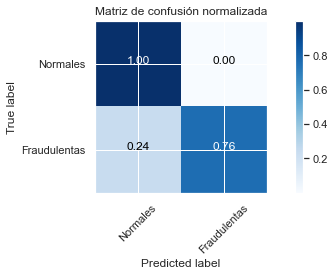

In [22]:
clasificador = XGBClassifier(n_jobs=-1, use_label_encoder=False)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)

print(classification_report(y_test,yhat,digits=3))

cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normales','Fraudulentas'],
                      title='Matriz de confusión normalizada', normalize=True)

plt.show()

Lastly, the XGBClassifier is used, which gives a value of 0.922, with 100% of true negatives and 76% of true positives being correct, being the algorithm selected for the prediction of fraudulent transactions.

To improve the model, and in particular to improve the detection rate of true positives, the SMOTE (Synthetic Minority Oversampling TEchnique) technique has been used, which consists of creating new synthetic values for class balancing, but it has resulted in an over-trained model, so its use has been discarded.